In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Life_Expectancy_Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Costa Rica,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [4]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
null_alcohol = data[data['Alcohol'].isnull()]
null_alcohol.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4


In [6]:
null_bmi = data[data[' BMI '].isnull()]
null_bmi.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.0,99.0,0,...,99.0,4.3,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.0,69.0,0,...,69.0,6.5,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1


In [7]:
is_2015 = data[data['Year']==2015].index
data_wo_2015 = data.drop(is_2015)
data_wo_2015

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
is_s_sudan = data_wo_2015[data_wo_2015["Country"]=="South Sudan"].index
is_s_sudan

Int64Index([2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420,
            2421, 2422, 2423, 2424],
           dtype='int64')

In [9]:
data_alcohol = data_wo_2015.drop(is_s_sudan)
data_alcohol

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [10]:
data_alcohol.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                              2
percentage expenditure               0
Hepatitis B                        529
Measles                              0
 BMI                                17
under-five deaths                    0
Polio                                8
Total expenditure                   33
Diphtheria                           8
 HIV/AIDS                            0
GDP                                411
Population                         611
 thinness  1-19 years               17
 thinness 5-9 years                 17
Income composition of resources    157
Schooling                          153
dtype: int64

In [11]:
data_1 = data_alcohol[data_alcohol['Life expectancy '].isnull()].index
data_1

Int64Index([624, 769, 1650, 1715, 1812, 1909, 1958, 2167, 2216, 2713], dtype='int64')

In [12]:
data_2 = data_alcohol.drop(data_1) 
data_2

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [13]:
na_bmi = data_2[data_2[" BMI "].isnull()].index
na_bmi

Int64Index([2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468,
            2469, 2470, 2471, 2472],
           dtype='int64')

In [14]:
data_3 = data_2.drop(na_bmi)
data_3

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [15]:
data_3.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              1
percentage expenditure               0
Hepatitis B                        524
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                8
Total expenditure                   33
Diphtheria                           8
 HIV/AIDS                            0
GDP                                406
Population                         603
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    150
Schooling                          150
dtype: int64

In [16]:
data_4 = data_3[data_3['Alcohol'].isnull()].index
data_4

Int64Index([1742], dtype='int64')

In [17]:
data_clean = data_3.drop(data_4)
data_clean.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        523
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                7
Total expenditure                   33
Diphtheria                           7
 HIV/AIDS                            0
GDP                                406
Population                         603
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    150
Schooling                          150
dtype: int64

In [18]:
## Dropping multiple columns at the same time.

In [19]:
to_drop = ["Hepatitis B", "Polio", "Total expenditure", "Diphtheria ", "GDP", "Population", "Income composition of resources","Schooling"]
data_clean.drop(to_drop, inplace=True, axis=1)

In [21]:
#include='all' shows all the data not only numerical
data_clean.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
count,2714,2714.000000,2714,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000
unique,181,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Costa Rica,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,2234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.000737,NaN,69.189867,164.181282,30.686441,4.630814,797.716225,2499.415623,37.927598,42.594694,1.819049,4.872623,4.902763
std,NaN,4.321915,NaN,9.556044,125.469188,120.712659,4.055383,2056.972728,11750.102006,19.878414,164.489634,5.259353,4.441879,4.531226
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,0.000000,1.000000,0.000000,0.100000,0.100000,0.100000
25%,NaN,2003.000000,NaN,63.200000,73.000000,0.000000,0.900000,10.695176,0.000000,19.000000,0.000000,0.100000,1.600000,1.600000
50%,NaN,2007.000000,NaN,72.100000,143.000000,3.000000,3.795000,82.304580,17.000000,43.050000,4.000000,0.100000,3.300000,3.350000
75%,NaN,2011.000000,NaN,75.600000,225.750000,21.000000,7.747500,499.165796,372.000000,55.800000,26.000000,0.800000,7.200000,7.300000


In [22]:
data_clean.isnull().sum()

Country                   0
Year                      0
Status                    0
Life expectancy           0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Measles                   0
 BMI                      0
under-five deaths         0
 HIV/AIDS                 0
 thinness  1-19 years     0
 thinness 5-9 years       0
dtype: int64

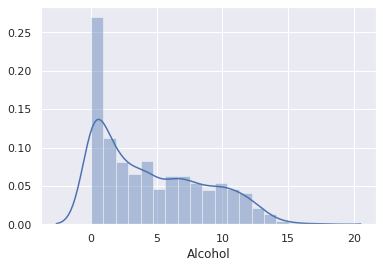

In [24]:
sns.distplot(data_clean["Alcohol"])

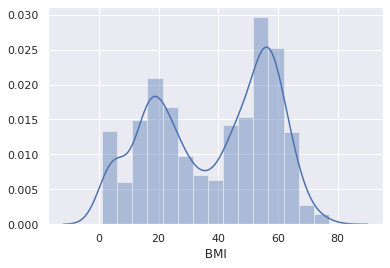

In [25]:
sns.distplot(data_clean[" BMI "])

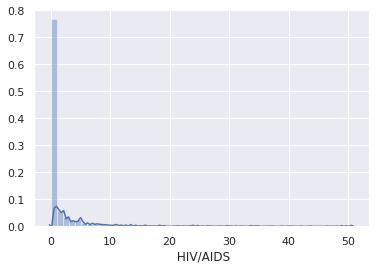

In [26]:
# Based on the PDF, BMI is bimodel distrubition
sns.distplot(data_clean[' HIV/AIDS'])

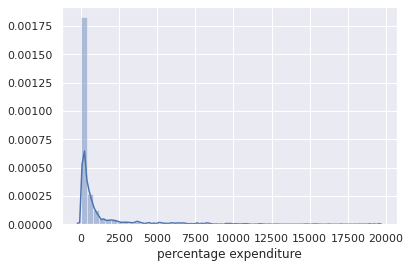

In [27]:
sns.distplot(data_clean['percentage expenditure'])

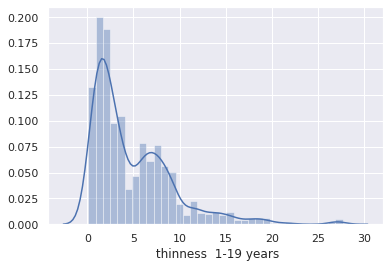

In [28]:
sns.distplot(data_clean[' thinness  1-19 years'])

In [29]:
round(data_clean[['Status','Life expectancy ']].groupby('Status').mean(),2)

,Life expectancy
Status,
Developed,79.10
Developing,67.06


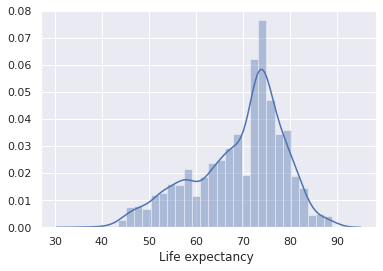

In [30]:
sns.distplot(data_clean['Life expectancy '])

In [31]:
data_clean["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In [32]:
# Transform to categorical data to numerical data, 1 stands for "Developed countries, and 0 for "developing countries
data_clean["Status"] = data_clean["Status"].map({'Developed':1,'Developing':0})

In [33]:
data_clean['Status'].unique()

array([0, 1])

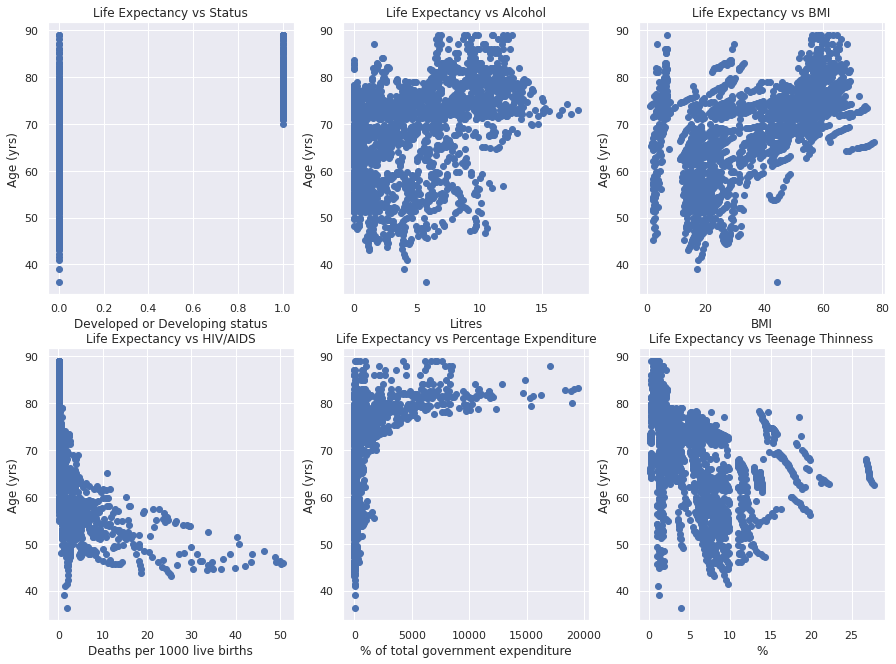

In [34]:
plt.figure(figsize=(15,35))

plt.subplot(6,3,1)
plt.scatter(data_clean['Status'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Status")
plt.xlabel('Developed or Developing status')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,2)
plt.scatter(data_clean['Alcohol'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Alcohol")
plt.xlabel('Litres')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,3)
plt.scatter(data_clean[' BMI '], data_clean["Life expectancy "])
plt.title("Life Expectancy vs BMI")
plt.xlabel('BMI')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,4)
plt.scatter(data_clean[' HIV/AIDS'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs HIV/AIDS")
plt.xlabel('Deaths per 1000 live births')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,5)
plt.scatter(data_clean['percentage expenditure'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Percentage Expenditure")
plt.xlabel('% of total government expenditure')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,6)
plt.scatter(data_clean[' thinness  1-19 years'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Teenage Thinness")
plt.xlabel('%')
plt.ylabel('Age (yrs)')

plt.show()

In [ ]:
#It did not work but, box coxis a tranformation technic for the data not normaly distributed
# Try to transform Box-Cox, because the data is not normaly distributed

#from scipy import stats

# get values from our data_clean columns
#t_alcohol = np.asarray(data_clean['Alcohol'].values)

#tranfrom values and store as "d_t_"
#d_t_alcohol = stats.boxcox(t_alcohol)[0]

#plot the transformed data
#plt.hist(d_t_alcohol,bins=10)
#plt.show()